In [1]:
# Early WIP

In [2]:
# V 1.13
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

#Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
    'grid.color': SC,
    'figure.frameon': False,
#     'axes.grid': True,

})


Loading BokehJS ...

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'none',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.

In [4]:
# Additional imports
from bokeh.layouts import layout, widgetbox
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, PanTool
from bokeh.models.widgets import Slider, Select, TextInput, Div
from bokeh.models import WheelZoomTool, SaveTool, LassoSelectTool
from bokeh.io import curdoc
from functools import lru_cache

In [5]:
df = pd.read_csv(
    ZipFile('data/ks-projects-201801.csv.zip').open('ks-projects-201801.csv'), 
    parse_dates=['deadline', 'launched'])
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"


In [6]:
df.shape

(378661, 15)

In [7]:
old_columns = df.columns

In [8]:
old_columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [9]:
# Changing columns to 'camel case'
new_cols = []
for col in old_columns:
    col = col.replace('_', ' ')
    col = col.title()
    col = col.replace(' ', '')
    col = col.replace('Usd', 'USD')
    new_cols.append(col)
new_cols

['Id',
 'Name',
 'Category',
 'MainCategory',
 'Currency',
 'Deadline',
 'Goal',
 'Launched',
 'Pledged',
 'State',
 'Backers',
 'Country',
 'USDPledged',
 'USDPledgedReal',
 'USDGoalReal']

In [10]:
df.columns = new_cols

In [11]:
df.head(2)

,Id,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country,USDPledged,USDPledgedReal,USDGoalReal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
Id                378661 non-null int64
Name              378657 non-null object
Category          378661 non-null object
MainCategory      378661 non-null object
Currency          378661 non-null object
Deadline          378661 non-null datetime64[ns]
Goal              378661 non-null float64
Launched          378661 non-null datetime64[ns]
Pledged           378661 non-null float64
State             378661 non-null object
Backers           378661 non-null int64
Country           378661 non-null object
USDPledged        374864 non-null float64
USDPledgedReal    378661 non-null float64
USDGoalReal       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 43.3+ MB


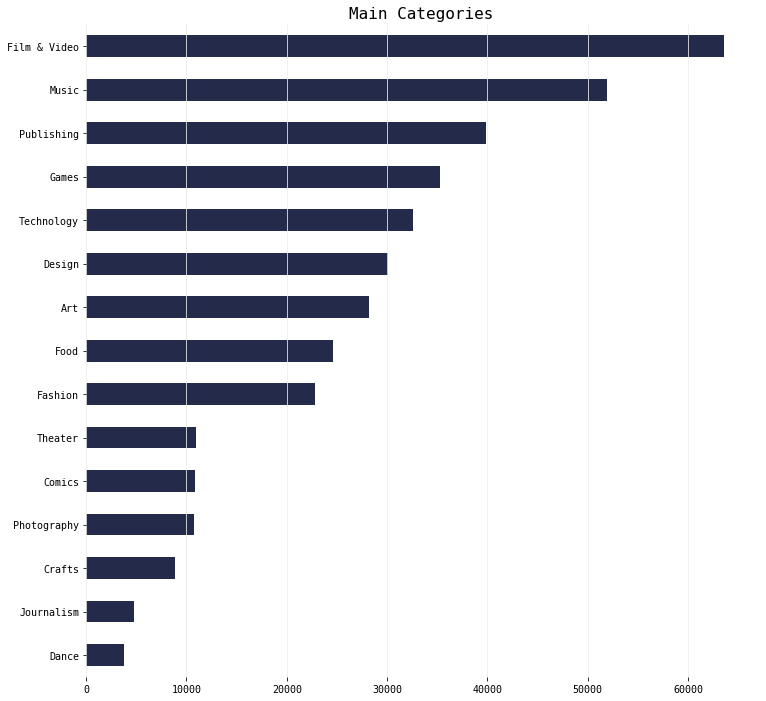

In [13]:
plt.figure(figsize=(12, 12))
plt.axes(frameon=False)
df.MainCategory.value_counts().sort_values(ascending=True).plot(kind='barh', color=MC);
plt.grid(axis='x', color=SC)
plt.title('Main Categories');

In [14]:
categories_num = len(df.Category.value_counts())
print(f'There are {categories_num} categories.'.upper())
df.Category.value_counts()

THERE ARE 159 CATEGORIES.


Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Makerspaces            238
Printing               238
M

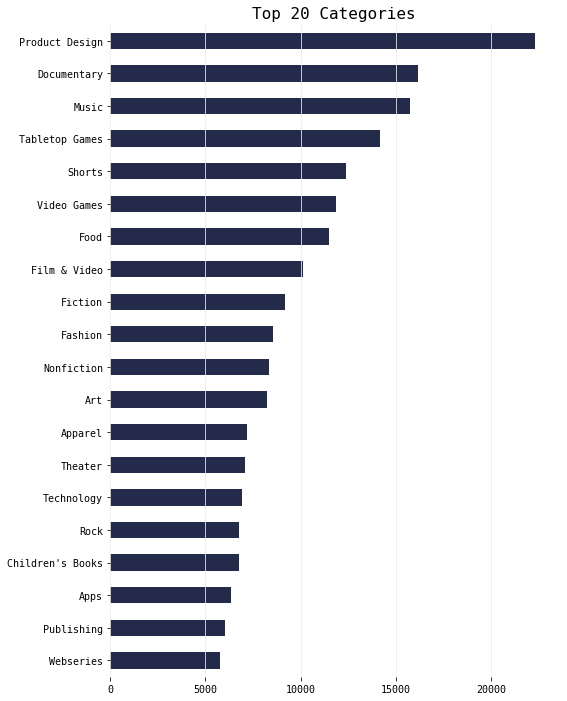

In [15]:
plt.figure(figsize=(8, 12))
plt.axes(frameon=False)
df.Category.value_counts()[:20].sort_values(ascending=True).plot(kind='barh', color=MC);
plt.grid(axis='x', color=SC)
plt.title('Top 20 Categories');

In [16]:
df.head()

,Id,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country,USDPledged,USDPledgedReal,USDGoalReal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


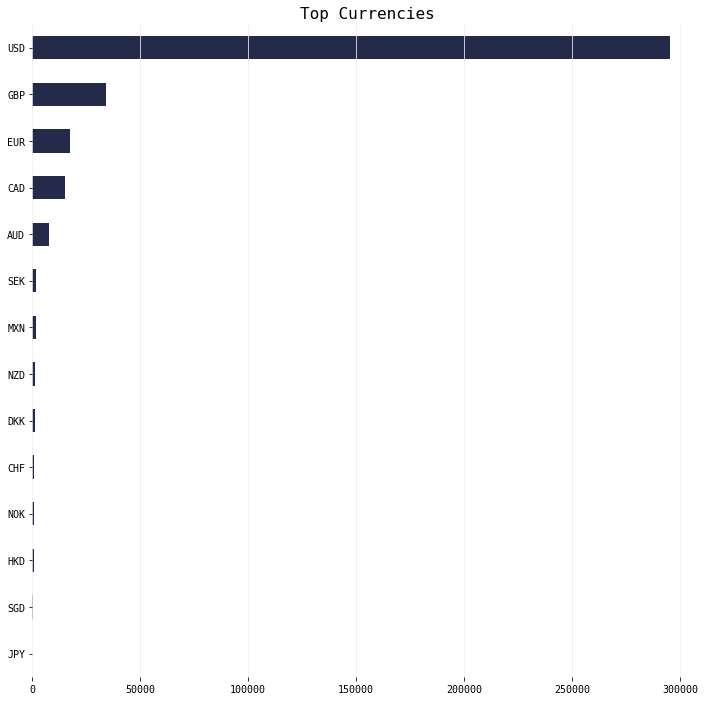

In [17]:
plt.figure(figsize=(12, 12))
plt.axes(frameon=False)
df.Currency.value_counts().sort_values(ascending=True).plot(kind='barh', color=MC);
plt.grid(axis='x', color=SC)
plt.title('Top Currencies');

In [18]:
df.State.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: State, dtype: int64

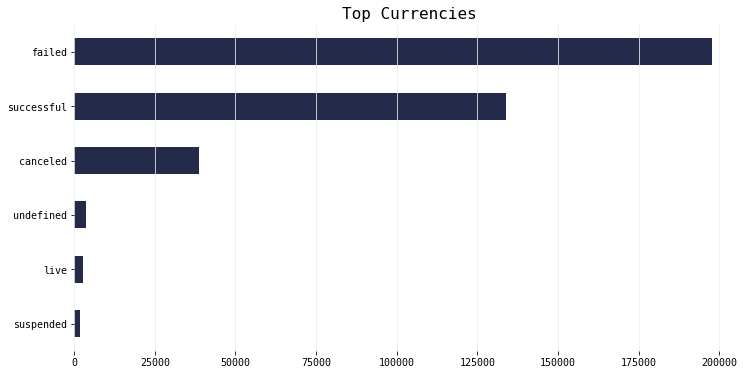

In [19]:
plt.axes(frameon=False)
df.State.value_counts().sort_values(ascending=True).plot(kind='barh', color=MC);
plt.grid(axis='x', color=SC)
plt.title('Top Currencies');

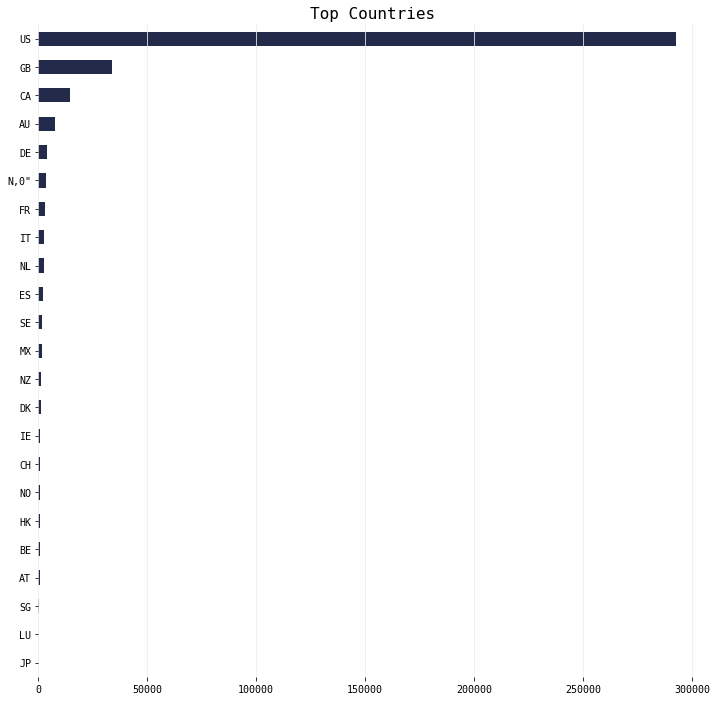

In [20]:
plt.figure(figsize=(12, 12))
plt.axes(frameon=False)
df.Country.value_counts().sort_values(ascending=True).plot(kind='barh', color=MC);
plt.grid(axis='x', color=SC)
plt.title('Top Countries');

In [21]:
df[df.Launched < '2000'].Launched = np.nan

In [22]:
df[df.Launched < '2000']

,Id,Name,Category,MainCategory,Currency,Deadline,Goal,Launched,Pledged,State,Backers,Country,USDPledged,USDPledgedReal,USDGoalReal
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,"5,000.00",1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,"5,000.00"
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,"15,000.00",1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,"15,000.00"
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,700.00
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,"4,000.00",1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,"4,000.00"
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,"10,000.00",1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,"10,000.00"
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,500.00
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,"1,900.00",1970-01-01 01:00:00,0.00,suspended,0,CH,0.00,0.00,"1,905.97"


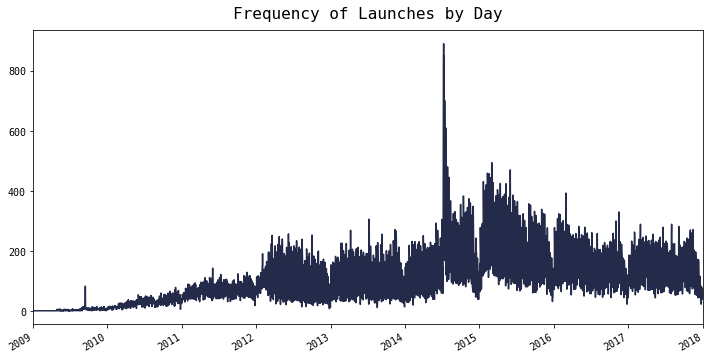

In [23]:
df.Launched.dt.round('D').value_counts().sort_values().plot(color=MC)
plt.xlim(['2009', '2018']);
plt.title('Frequency of Launches by Day', y=1.02);

In [28]:
df.Category.value_counts()

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Makerspaces            238
Printing               238
M

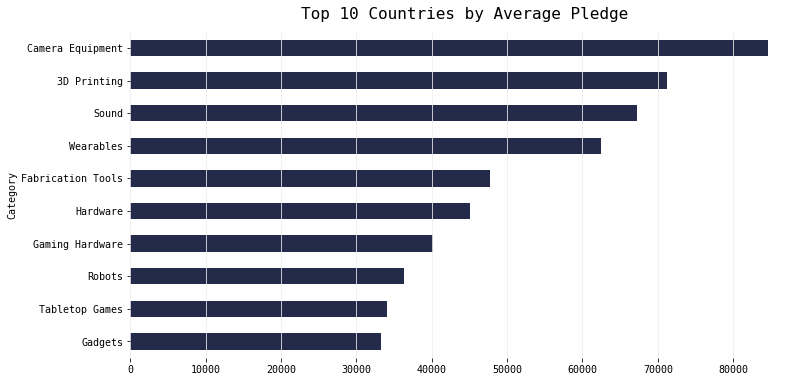

In [47]:
top_num = 10
plt.axes(frameon=False)
df.groupby('Category').Pledged.mean().sort_values(ascending=False)[:top_num].sort_values().plot(kind='barh', color=MC)
plt.grid(axis='x', color=SC)
plt.title(f'Top {top_num} Countries by Average Pledge', y=1.02);

In [51]:
df['GoalPledged'] = df.Pledged - df.Goal

In [54]:
df.groupby('Category').GoalPledged.mean().sort_values()

Category
Movie Theaters      -1,545,067.39
Fantasy               -597,699.29
Space Exploration     -584,319.91
Video                 -556,386.31
Architecture          -459,162.51
Science Fiction       -416,504.39
Television            -405,268.22
Action                -332,741.41
Translations          -256,397.07
Thrillers             -244,584.79
Robots                -220,172.61
Drama                 -203,585.98
Live Games            -174,479.29
Fabrication Tools     -164,807.96
Technology            -161,087.45
Installations         -151,354.39
Civic Design          -147,004.55
Immersive             -145,973.59
Young Adult           -145,713.20
Horror                -142,386.10
Software              -141,910.15
Makerspaces           -132,263.76
Flight                -119,533.70
Farms                 -115,832.94
Restaurants           -106,074.30
Spaces                 -97,444.63
Web                    -89,185.47
Animation              -85,965.17
Family                 -85,037.08
Gamin

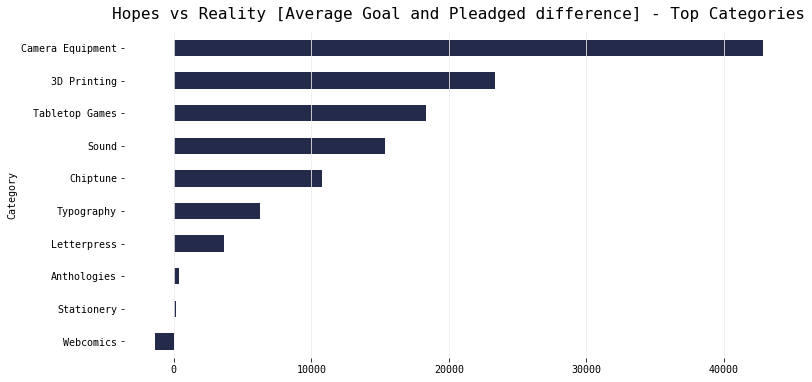

In [108]:
plt.axes(frameon=False)
df.groupby('Category').GoalPledged.mean().sort_values(ascending=False)[:top_num].sort_values().plot(kind='barh', color=MC)
plt.grid(axis='x', color=SC)
plt.title(f'Hopes vs Reality [Average Goal and Pleadged difference] - Top Categories', y=1.02);

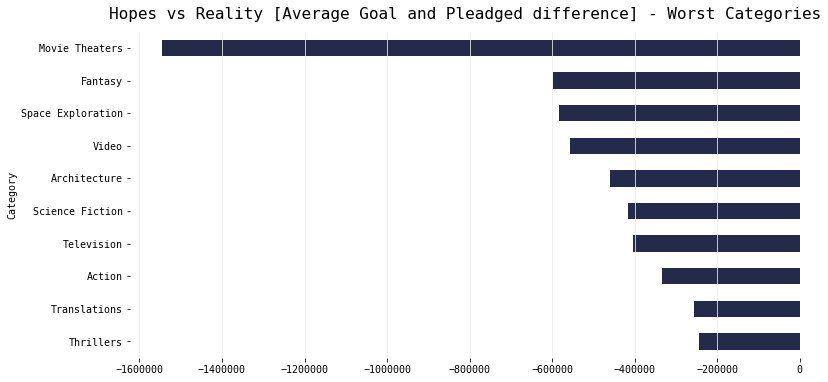

In [109]:
plt.axes(frameon=False)
df.groupby('Category').GoalPledged.mean().sort_values()[:top_num].sort_values(ascending=False).plot(kind='barh', color=MC)
plt.grid(axis='x', color=SC)
plt.title(f'Hopes vs Reality [Average Goal and Pleadged difference] - Worst Categories', y=1.02);

In [72]:
top_idx = df.Pledged.sort_values(ascending=False)[:20].index
df.loc[top_idx, ['Name', 'Pledged']]

,Name,Pledged
157270,"Pebble Time - Awesome Smartwatch, No Compromises","20,338,986.27"
250254,COOLEST COOLER: 21st Century Cooler that's Act...,"13,285,226.36"
216629,"Pebble 2, Time 2 + All-New Pebble Core","12,779,843.49"
289915,Kingdom Death: Monster 1.5,"12,393,139.69"
282416,Pebble: E-Paper Watch for iPhone and Android,"10,266,845.74"
218147,Expect the Unexpected. digiFilm™ Camera by YAS...,"10,035,296.00"
293861,The World's Best TRAVEL JACKET with 15 Feature...,"9,192,055.66"
187652,Exploding Kittens,"8,782,571.99"
6665,OUYA: A New Kind of Video Game Console,"8,596,474.58"
309630,"THE 7th CONTINENT – What Goes Up, Must Come Down.","7,072,757.00"


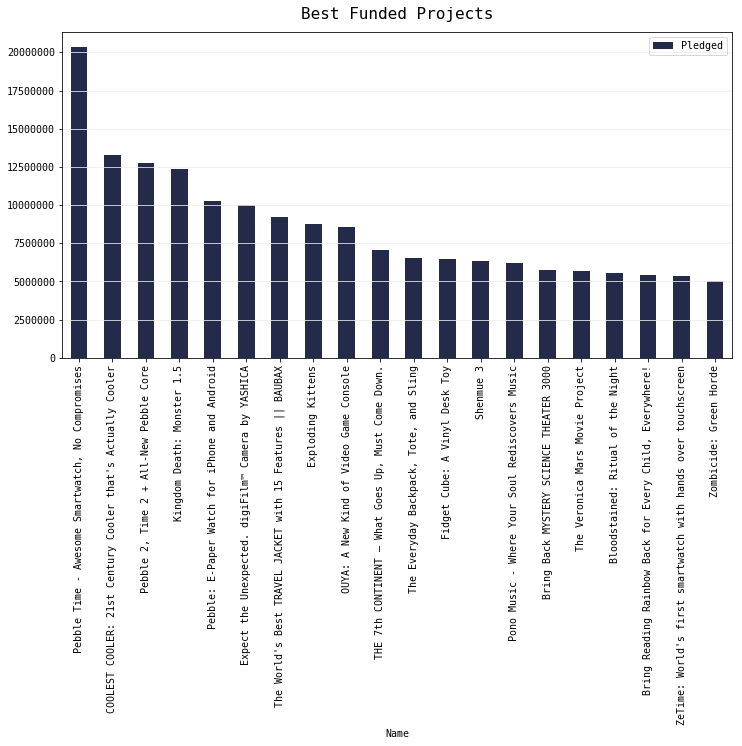

In [107]:
plt.figure(figsize=(12, 8))
top_idx = df.Pledged.sort_values(ascending=False)[:20].index
df.loc[top_idx, ['Name', 'Pledged']].set_index('Name').plot(kind='bar', color=MC)
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Turn off scientific notation
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.grid(axis='y', color=SC)
plt.title(f'Best Funded Projects', y=1.02);

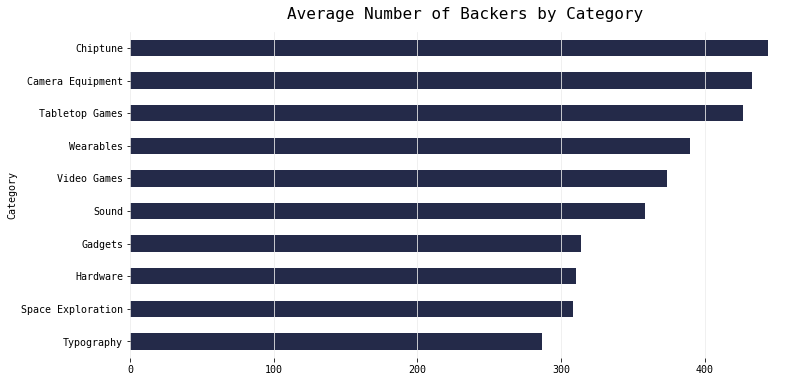

In [114]:
plt.axes(frameon=False)
df.groupby('Category').Backers.mean().sort_values(ascending=False)[:top_num].sort_values().plot(kind='barh', color=MC)
plt.grid(axis='x', color=SC)
plt.title(f'Average Number of Backers by Category', y=1.02);

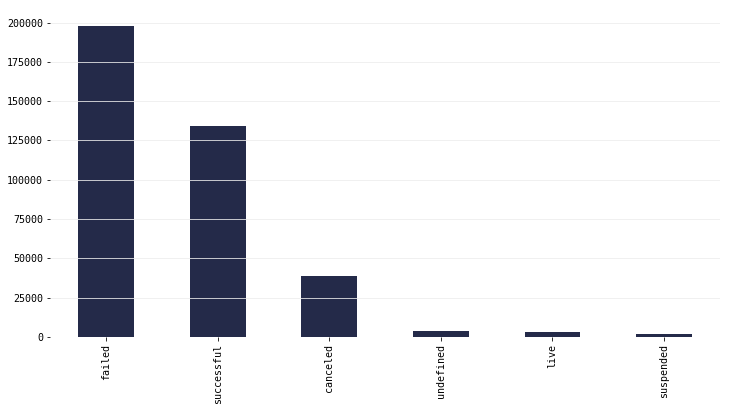

In [123]:
plt.axes(frameon=False)
df.State.value_counts().plot(kind='bar', color=MC)
plt.grid(axis='y', color=SC)

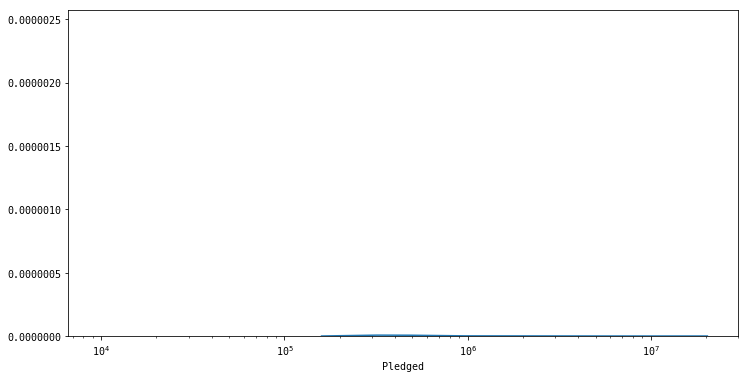

In [135]:
sns.distplot(df.Pledged)

# Turn off scientific notation
# ax = plt.gca()
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# plt.xscale('log')
# plt.yscale('log')